## 라이브러리 로드

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
!pip install koreanize-matplotlib
import koreanize_matplotlib

%config InlineBackend.figure_format = 'retina'

## 데이터 로드
* parquet 형식 로드를 위한 라이브러리가 설치되어 있어야 합니다.

In [5]:
df = pd.read_parquet("https://github.com/corazzon/KaggleStruggle/raw/master/online-retail/data/online_retail.gzip")
df.shape

(541909, 8)

In [21]:
# 주문 가격
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   InvoiceNo    541909 non-null  category
 1   StockCode    541909 non-null  category
 2   Description  540455 non-null  category
 3   Quantity     541909 non-null  int32   
 4   InvoiceDate  541909 non-null  category
 5   UnitPrice    541909 non-null  float64 
 6   CustomerID   406829 non-null  float32 
 7   Country      541909 non-null  category
 8   TotalPrice   541909 non-null  float64 
dtypes: category(5), float32(1), float64(2), int32(1)
memory usage: 19.3 MB


In [24]:
df.describe()

,Quantity,UnitPrice,CustomerID,TotalPrice
count,541909.000000,541909.000000,406829.000000,541909.000000
mean,9.552250,4.611114,15287.689453,17.987795
std,218.081158,96.759853,1713.600342,378.810824
min,-80995.000000,-11062.060000,12346.000000,-168469.600000
25%,1.000000,1.250000,13953.000000,3.400000
50%,3.000000,2.080000,15152.000000,9.750000
75%,10.000000,4.130000,16791.000000,17.400000
max,80995.000000,38970.000000,18287.000000,168469.600000


<Axes: ylabel='TotalPrice'>

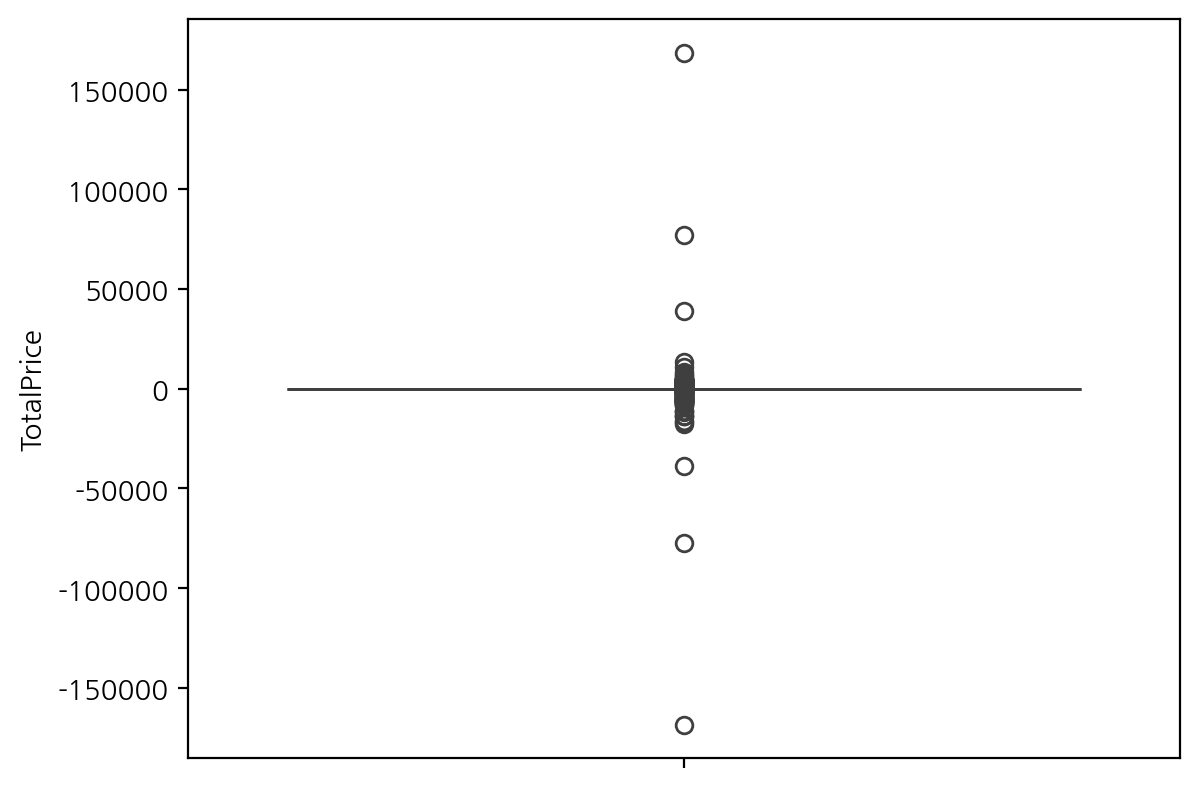

In [23]:
sns.boxplot(df['TotalPrice'])

<Axes: ylabel='UnitPrice'>

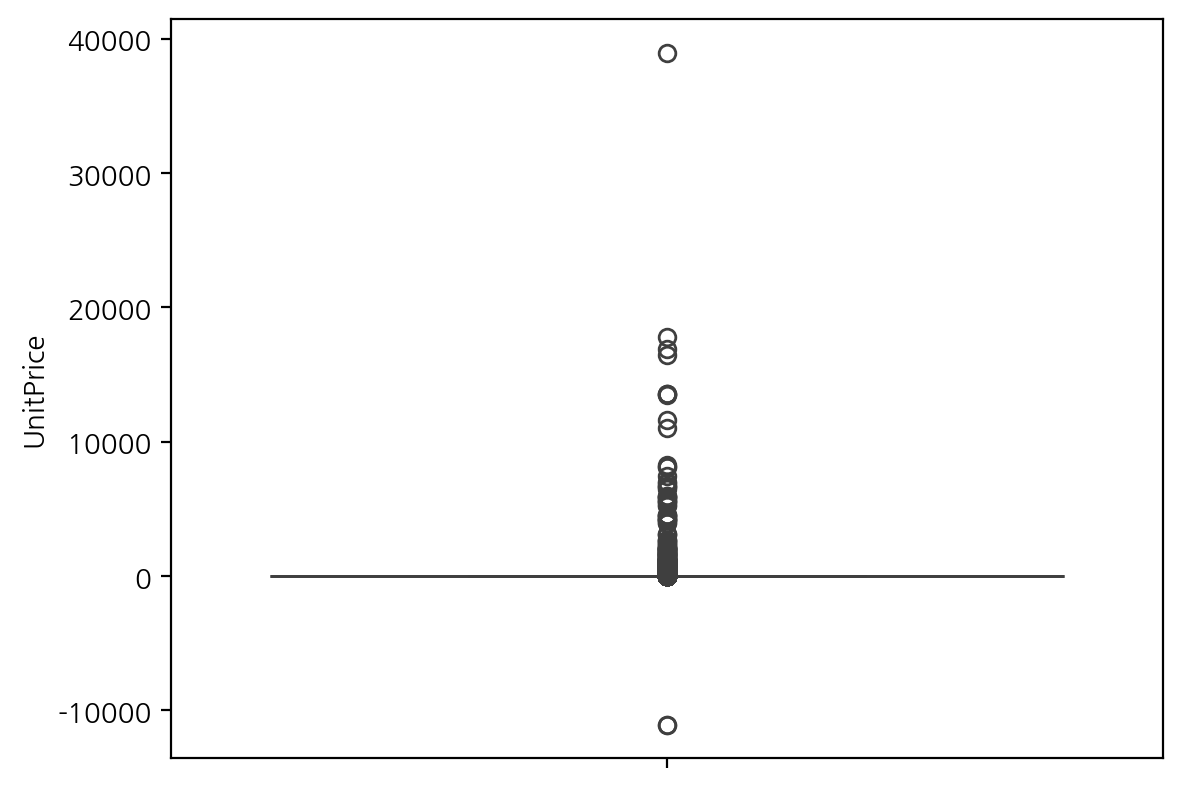

In [26]:
sns.boxplot(df['UnitPrice'])

<Axes: ylabel='Quantity'>

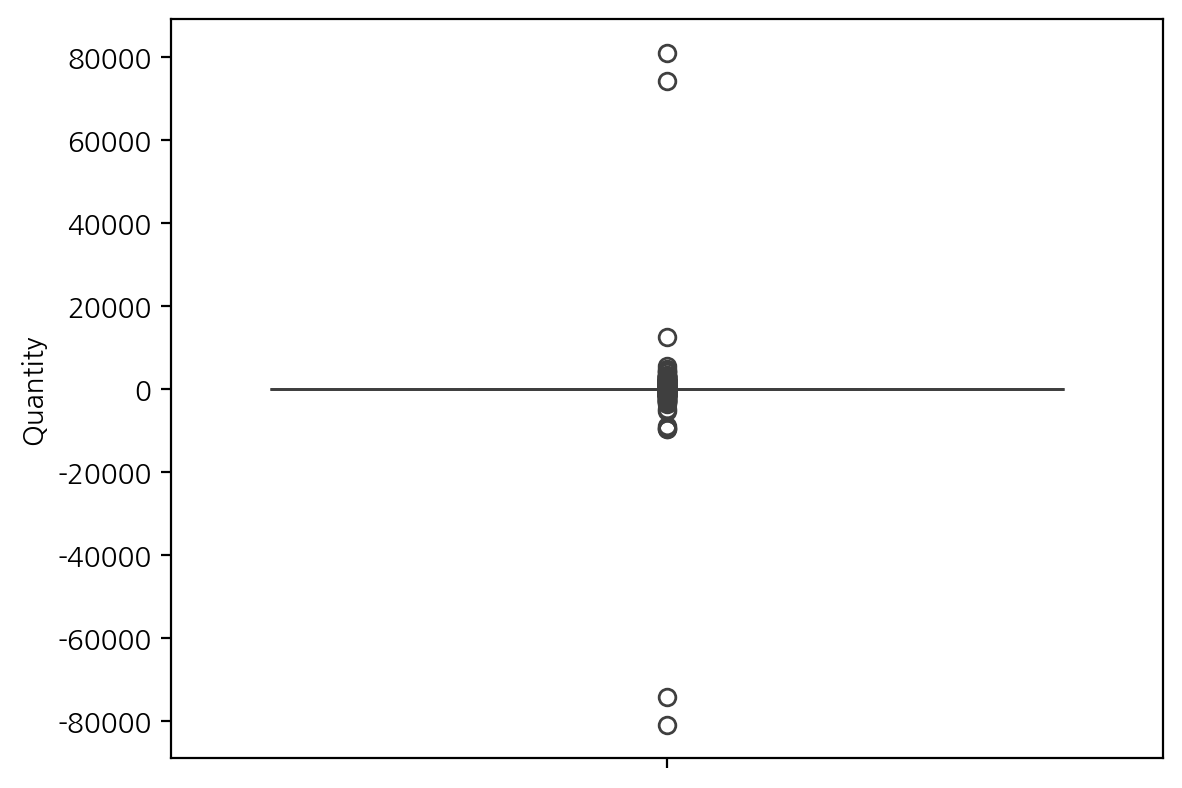

In [25]:
sns.boxplot(df['Quantity'])

## 미션 1) 모집단과 표본 추출을 하고 TotalPrice에 대해 비교해 주세요.
데이터셋에서 무작위로 1000개의 표본을 추출하고, 추출된 표본과 전체 데이터셋의 'TotalPrice'에 대해 평균과 표준편차를 비교하세요. 이를 통해 모집단과 표본의 차이를 설명하고, 중심극한정리가 어떻게 적용되는지 설명하세요.

* pandas 의 sample 을 활용할 수 있으며, pandas 의 기술 통계 기능을 활용해 볼 수 있습니다.
* 참고 : 슬라이드에서 중심극한정리를 찾아보세요.

In [11]:
from sklearn.preprocessing import StandardScaler

In [38]:
sc = StandardScaler()
df_norm = sc.fit_transform(pd.DataFrame(df['TotalPrice']))

In [61]:
df['TotalPrice'].describe()

count    541909.000000
mean         17.987795
std         378.810824
min     -168469.600000
25%           3.400000
50%           9.750000
75%          17.400000
max      168469.600000
Name: TotalPrice, dtype: float64

In [12]:
np.random.seed(0)
sample_means = []
n_samples = 1000
sample_size = 100

for _ in range(n_samples):
    sample = df['TotalPrice'].sample(n=sample_size)
    sample_means.append(np.mean(sample))

In [29]:
pd.DataFrame(sample_means).describe()

,0
count,1000.000000
mean,18.327958
std,10.003339
min,-159.186300
25%,14.432375
50%,16.880800
75%,20.629725
max,72.306900


모집단은 조사하고자 하는 전체 집단이고 표본은 모집단에서 선택된 일부 관측값의 집합이다. 표본은 모집단을 대표할 수 있는 충분히 작은 그룹으로, 모집단의 특성을 추정하거나 모집단에 대한 가설을 검정하는데 사용될 수 있다.

중심극한 정리는 표본의 크기가 충분히 크다면, 표본 평균의 분포는 정규분포에 가까워지게된다.
여기서 표본의 평균을 사용하여 모집단의 평균을 추정할 수 있다.

표본평균 -> 18.3 , 모집단 평균 -> 17.98

## 미션2) 'Country' 변수를 바탕으로 가장 빈도가 높은 두 개의 국가를 선택하고, 각 국가의 'TotalPrice' 평균에 차이가 있는지 검증하세요. 독립표본 t-검정을 사용하여 가설을 설정하고 검정하며, 1종 오류와 2종 오류에 대해 설명하세요.


* 미션 진행 방법
    <br>1) 데이터 로드 후 'TotalPrice'와 'Country' 컬럼을 찾아주세요.
    <br>2) 데이터셋에서 주문이 가장 많은 상위 두 국가를 찾아주세요.
    <br>3) 통계적 검증 수행하기
    <br>4) 각 국가의 'TotalPrice' 평균을 계산하세요.
    <br>5) 독립표본 t-검정을 사용하여 두 국가 간 'TotalPrice' 평균의 차이가 통계적으로 유의미한지 검증하세요. 이 때, scipy.stats 라이브러리의 ttest_ind 함수를 사용할 수 있습니다. equal_var=False 파라미터를 설정하여 두 집단의 분산이 다르다고 가정하세요.
    <br>6) t-통계량과 p-값을 해석하여 결과를 설명하세요. 1종 오류와 2종 오류의 개념을 설명하고, 해당 데이터셋에 적용하여 설명해 주세요.

In [45]:
from scipy import stats
df_new = df[['Country','TotalPrice']]

In [49]:
df_new['Country'].value_counts()[:2]

United Kingdom    495478
Germany             9495
Name: Country, dtype: int64

In [56]:
group_A = df_new[df_new["Country"] == 'United Kingdom']['TotalPrice']
group_B = df_new[df_new["Country"] == 'Germany']['TotalPrice']

In [58]:
stats.ttest_ind(group_A,group_B,equal_var=False)

TtestResult(statistic=-10.046360185819829, pvalue=9.823416115791871e-24, df=86270.53867427883)

t-통계량은 두 그룹간의 평균 차이를 표준 오차로 나눈 값으로써, 이 값이 음수이기 때문에 U.K의 TotalPrice의 평균이 Germany의 TotalPrice의 평균보다 작다는 것을 나타낸다.

p-value는 귀무가설이 참일 때, 현재와 같은 결과를 얻을 확률로써, 작을수록 우리가 관측한 차이가 우연히 발생할 화률이 작다는 것을 의마한다. 이 값이 0.05의 유의수준보다 낮게 나와 우리는 귀무가설을 기각할 수 있다.

1종 오류란 : 귀무가설이 참인데도 귀무가설을 기각하는 경우이다(False Positive). 실제로 차이가 없는데 차이가 있다고 잘못 결정내리는 것을 뜻한다. 여기서 1종 오류가 발생할 확률은 유의 수준과 같다. 여기서 p_value 값이 낮게 나왔으므로 1종 오류가 발생할 확률이 매우 낮다

2종 오류란 : 귀무가설이 거짓인데도 귀무가설을 채택하는 경우이다(False Negative). 실제로 차이가 있는데 차이가 없다고 잘못 결론을 내리는 것이다. 여기서는 알 수 없다

## 미션 3) 주중, 주말에 따른 기술통계와 분위수 분석

'UnitPrice'의 분포를 분석하기 위해 상자수염그림과 히스토그램을 그리세요. 데이터의 분위수, 중심경향치(평균, 중간값), 변산성(표준편차, 분산)을 계산하고, 이들이 데이터 분포에 대해 설명해 주세요. 다음의 주어진 코드를 활용해 주세요.


```python
# 'InvoiceDate' 컬럼을 이용하여 주중과 주말을 구분
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek


df.loc[df['DayOfWeek'] <= 4, "WeekEnd"] = "주중"
df.loc[df['DayOfWeek'] > 4, "WeekEnd"] = "주말"

# 주중(월요일=0, 화요일=1, ..., 금요일=4)과 주말(토요일=5, 일요일=6)으로 데이터를 분리
weekday_data = df[df['DayOfWeek'] <= 4]  # 주중
weekend_data = df[df['DayOfWeek'] > 4]   # 주말
```

* 참고 : [pandas.DataFrame.describe — pandas documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)
* 참고 : 슬라이드의 "기술 통계" 부분을 찾아보세요.

In [62]:
# 'InvoiceDate' 컬럼을 이용하여 주중과 주말을 구분
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek


df.loc[df['DayOfWeek'] <= 4, "WeekEnd"] = "주중"
df.loc[df['DayOfWeek'] > 4, "WeekEnd"] = "주말"

# 주중(월요일=0, 화요일=1, ..., 금요일=4)과 주말(토요일=5, 일요일=6)으로 데이터를 분리
weekday_data = df[df['DayOfWeek'] <= 4]  # 주중
weekend_data = df[df['DayOfWeek'] > 4]   # 주말

In [66]:
df_2 = df[['WeekEnd','UnitPrice']]

<Axes: xlabel='WeekEnd', ylabel='Count'>

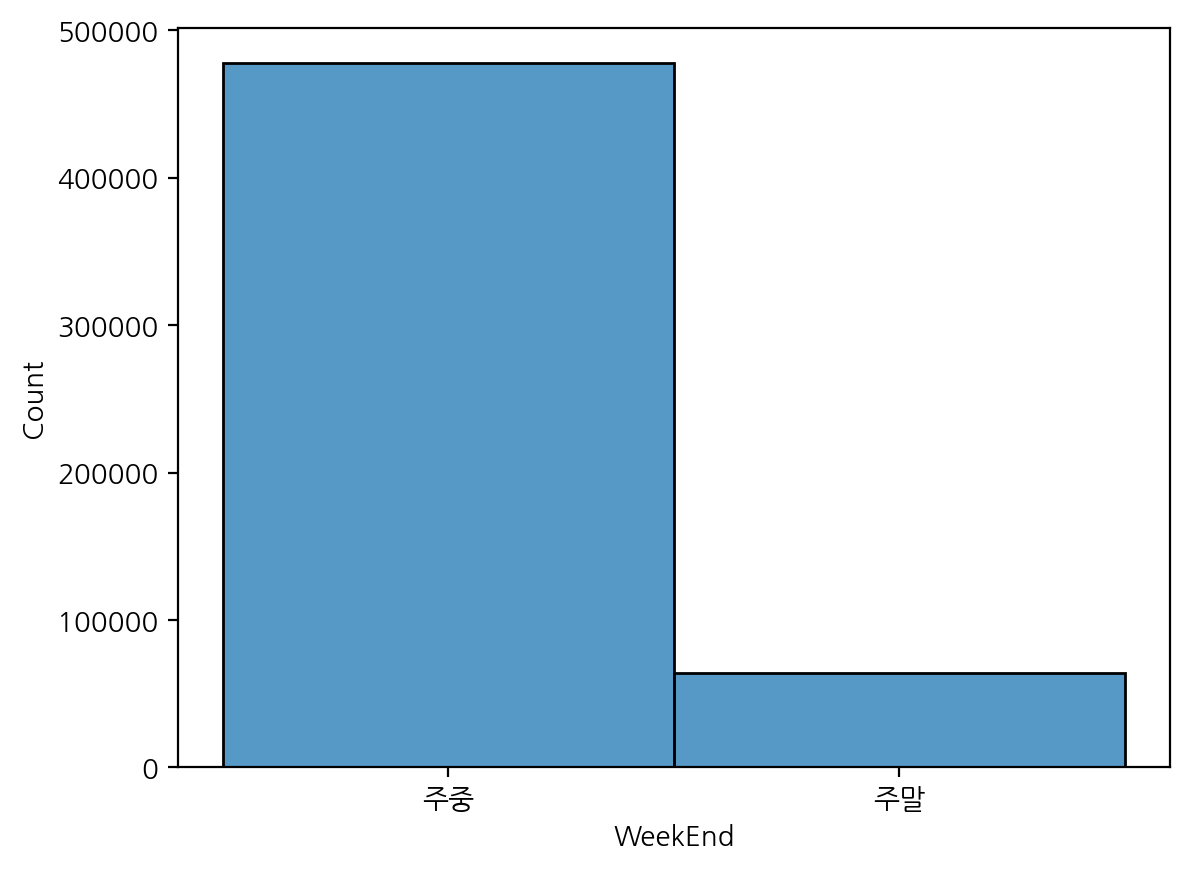

In [69]:
sns.histplot(df_2['WeekEnd'])

<Axes: xlabel='UnitPrice'>

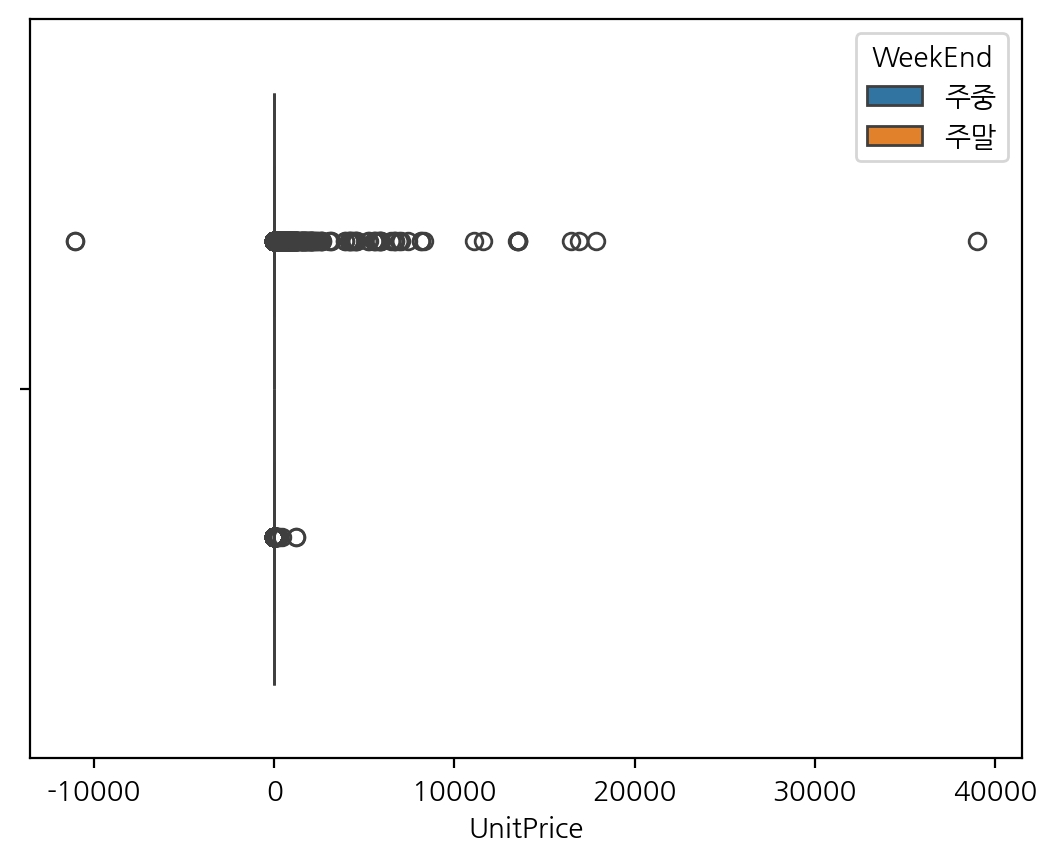

In [70]:
sns.boxplot(data=df_2, x='UnitPrice', hue ='WeekEnd')

In [72]:
df_2[df_2['WeekEnd']=='주중'].describe()

,UnitPrice
count,477534.000000
mean,4.843425
std,103.032058
min,-11062.060000
25%,1.250000
50%,2.100000
75%,4.130000
max,38970.000000


from matplotlib import pyplot as plt
_df_0['UnitPrice'].plot(kind='hist', bins=20, title='UnitPrice')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['UnitPrice'].plot(kind='line', figsize=(8, 4), title='UnitPrice')
plt.gca().spines[['top', 'right']].set_visible(False)

In [73]:
df_2[df_2['WeekEnd']=='주말'].describe()

,UnitPrice
count,64375.000000
mean,2.887824
std,7.959497
min,0.000000
25%,1.250000
50%,1.850000
75%,3.750000
max,1236.750000


평균 : 주중 평균 UnitPrice는 $4.84로 주말의 $2.89보다 높다.

중간값 : 주중 그룹의 중간값은 $2.10이고 주말은 $1.85이다. 중간값은 이상치에 영향을 받지 않아서 데이터의 대표값으로 쓸 수 있다.

분산 : 주중 그룹의 UnitPrice의 경우 편차가 매우 크므로, 주중 그룹의 데이터가 더 분산이 되어있는 것을 확인 할 수 있다.

분위수 : 주중과 주말 그룹의 1사분위수와 3사분위수의 값이 유사하다.

## 미션4)  'TotalPrice'의 중간값이 특정 값과 다른지 검증하기 위해 비모수 검정 (예: 맨-휘트니 U-검정)을 사용하세요. 검증 결과에 대해 비즈니스 관점에서 분석해 주세요.

* 비모수 검정은 데이터가 정규 분포를 따르지 않거나, 정규 분포에 대한 가정을 할 수 없을 때 사용됩니다. 특히, 작은 표본 크기, 이상치의 존재, 순위나 순서와 같은 비정량적 데이터에 적합합니다. 또한, 두 그룹 간의 중앙값이나 분포의 형태가 다를 때 비모수 검정을 사용할 수 있습니다.

* 맨-휘트니 U-검정은 두 독립적인 표본 간에 중앙값의 차이를 비교하는 데 사용됩니다. 이 검정은 두 그룹의 데이터가 서로 독립적이며, 최소한 서열 척도로 측정되어야 합니다. 데이터의 분포 형태에 대한 가정이 필요 없으며, 크기가 다른 두 표본에 대해서도 사용할 수 있습니다. 이 검정은 데이터의 중앙값이 특정 값과 다른지 여부를 검증하는 데 유용합니다.

다음의 주어진 코드를 활용해 주세요.

```python
from scipy.stats import mannwhitneyu
# 'TotalPrice' 컬럼을 생성합니다. 이는 'Quantity'와 'UnitPrice'의 곱으로 정의됩니다.
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
```

* 참고 : https://www.ibm.com/docs/ko/spss-statistics/beta?topic=tests-mann-whitney-u-test

In [80]:
from scipy.stats import mannwhitneyu

# 'TotalPrice' 컬럼을 생성합니다. 이는 'Quantity'와 'UnitPrice'의 곱으로 정의됩니다.
df_2['TotalPrice'] = df['Quantity'] * df['UnitPrice']

<ipython-input-80-73682cbd8067>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['TotalPrice'] = df['Quantity'] * df['UnitPrice']


In [82]:
df_2.head()

,WeekEnd,UnitPrice,TotalPrice
0,주중,2.55,15.30
1,주중,3.39,20.34
2,주중,2.75,22.00
3,주중,3.39,20.34
4,주중,3.39,20.34


In [96]:
group_weekday = df_2[df_2['WeekEnd']=='주중']['TotalPrice']
group_weekend = df_2[df_2['WeekEnd']=='주말']['TotalPrice']

mannwhitneyu(group_weekday, group_weekend)

MannwhitneyuResult(statistic=17561927109.5, pvalue=0.0)

낮은 p_value를 통해 주말과 주중의 소비그룹과 주말의 소비그룹에 유의미한 차이가 있다는 것을 파악할 수 있고, 이를 통해 주중과 주말을 구분한 마켓팅 전략이나 판매 전략을 짤 수 있을 것 같다.

## 미션5) UnitPrice 컬럼에 대한 95% 신뢰구간을 구하고  seaborn 으로 신뢰구간을 시각화 해주세요. 그리고 이 신뢰구간이 비즈니스 결정에 어떻게 활용될 수 있는지 설명하세요.

In [ ]:
from scipy import stats


<Axes: xlabel='WeekEnd', ylabel='UnitPrice'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47568 (\N{HANGUL SYLLABLE MAL}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47568 (\N{HANGUL S

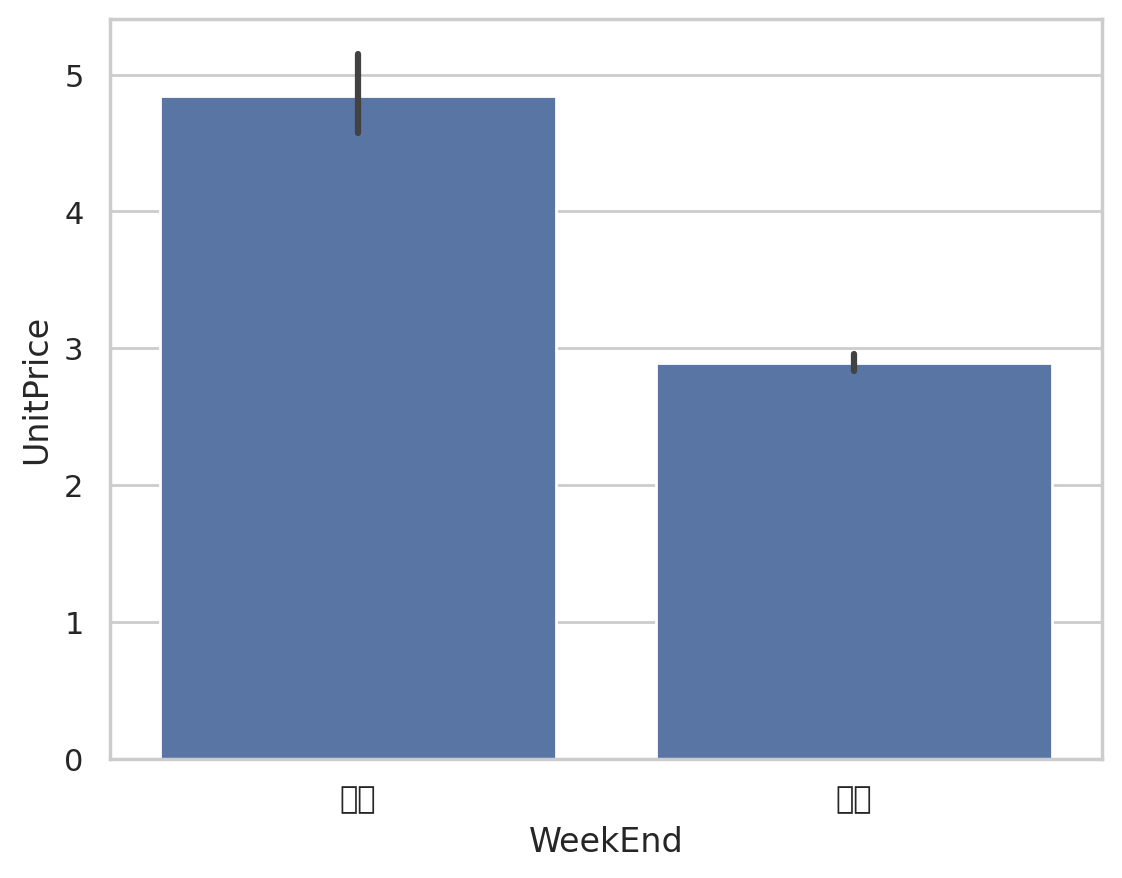

In [95]:
sns.barplot(data=df_2, x='WeekEnd',y='UnitPrice', errorbar='ci')


주말이나 주중에 따른 고객 그룹을 세분화 시켜 각그룹의 평균 가격을 비교하여 가격이나 프로모션 등의 전략을 개선 할 수 있다.

또는, 이를 활용하여 주중 또는 주말에 따른 마케팅 전략에 활용할 수 있다.